In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv('data\\train.csv')
test = pd.read_csv('data\\test.csv')
target = 'SalePrice'

# EDA

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [57]:
# Columns difference between train & test as expected is only the target = 'SalePrice'
train.columns.difference(test.columns)

Index(['SalePrice'], dtype='object')

SalePrice Distribution

Skewness: 1.88
Kurtosis: 6.54


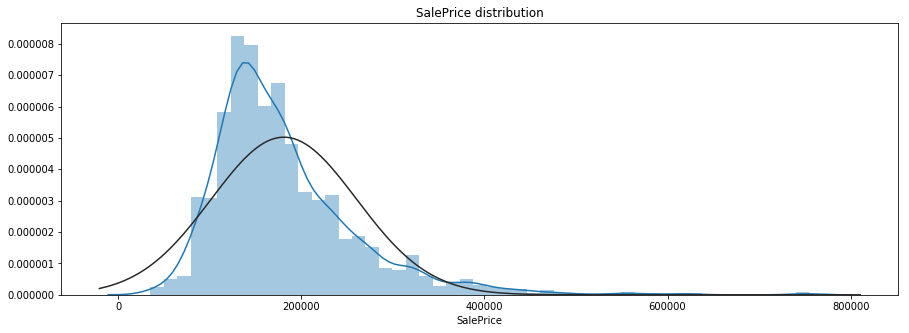

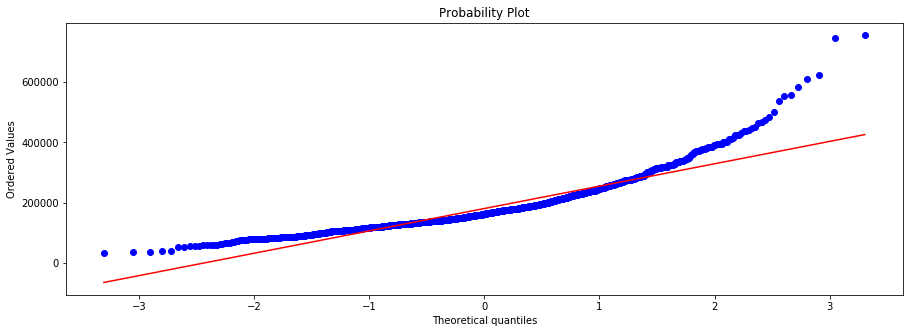

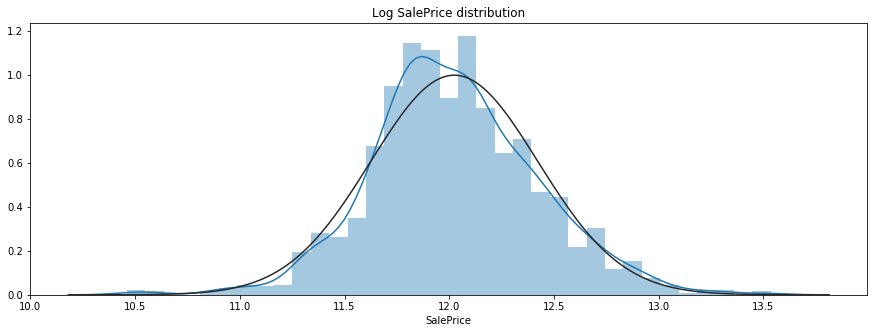

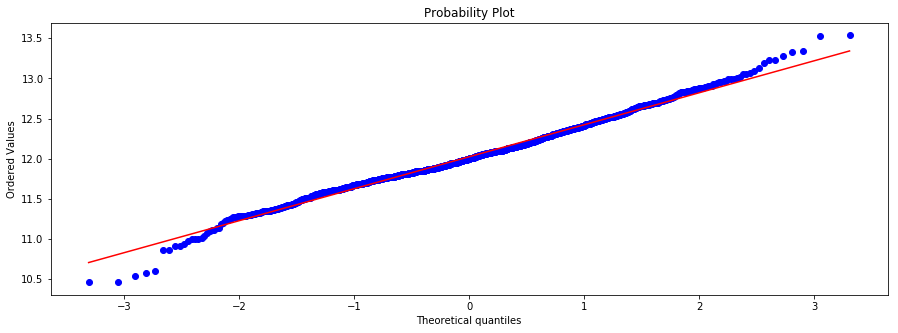

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print('Skewness: {:0.2f}'.format(train[target].skew()))
print('Kurtosis: {:0.2f}'.format(train[target].kurt()))

figsize = (15,5)
plt.figure(figsize=figsize)
plt.title('SalePrice distribution')
_ = sns.distplot(train[target], fit=stats.norm)
plt.figure(figsize=figsize)
stats.probplot(train[target], plot=plt)


figsize = (15,5)
plt.figure(figsize=figsize)
plt.title('Log SalePrice distribution')
_ = sns.distplot(train[target].map(np.log), fit=stats.norm)
plt.figure(figsize=figsize)
_ = stats.probplot(train[target].map(np.log), plot=plt)

Numerical Columns

In [59]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.difference([target]).tolist()
print('Numerical Columns unique values')
train[num_cols].nunique().sort_values(ascending=False)

Numerical Columns unique values


Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
MSSubClass         15
MoSold             12
TotRmsAbvGrd       12
OverallQual        10
OverallCond         9
BedroomAbvGr        8
PoolArea            8
YrSold              5
GarageCars          5
BsmtFullBath        4
Fireplaces          4
FullBath            4
KitchenAbvGr        4
BsmtHalfBath        3
HalfBath            3
dtype: int64

In [60]:
num_cat_features = [
    'OverallQual',
    'OverallCond'
]

Object Columns

In [61]:
obj_cols = train.select_dtypes(include=['O']).columns.difference([target]).tolist()
print('Obj Columns unique values')
train[obj_cols].nunique().sort_values(ascending=False)

Obj Columns unique values


Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
Heating           6
BsmtFinType2      6
Foundation        6
GarageType        6
BsmtFinType1      6
SaleCondition     6
RoofStyle         6
FireplaceQu       5
GarageCond        5
Electrical        5
ExterCond         5
MSZoning          5
GarageQual        5
BldgType          5
HeatingQC         5
LotConfig         5
ExterQual         4
BsmtCond          4
LotShape          4
MasVnrType        4
LandContour       4
Fence             4
MiscFeature       4
KitchenQual       4
BsmtExposure      4
BsmtQual          4
GarageFinish      3
PoolQC            3
PavedDrive        3
LandSlope         3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

Define Numerical & Categorical Features

In [62]:
num_features = train[num_cols].columns.difference(num_cat_features).tolist()
print('Numerical Features', len(num_features))
print(num_features)

cat_features = obj_cols+num_cat_features

print('\nCategorical Features', len(cat_features))
print(cat_features)

Numerical Features 35
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']

Categorical Features 45
['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood

Some Plots

In [63]:
def plots_vs_sale_price(plot_obj, *cols):
    def foo(c1, c2):
        _, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        plt.sca(ax1)
        plot_obj(x=c1, y='SalePrice', data=train)
        plt.sca(ax2)
        plot_obj(x=c2, y='SalePrice', data=train)
    cols = list(cols)
    n = len(cols)
    for i in range(0, n, 2):
        if i+1 < n:
            foo(cols[i], cols[i+1])
        else:
            foo(cols[i], cols[i])

Scatter Plots for numerical features

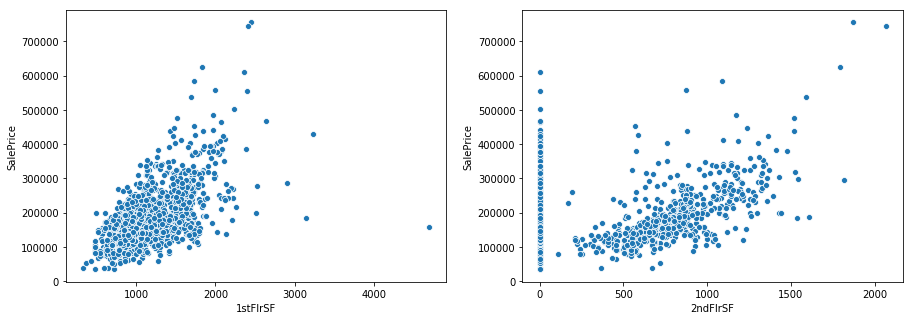

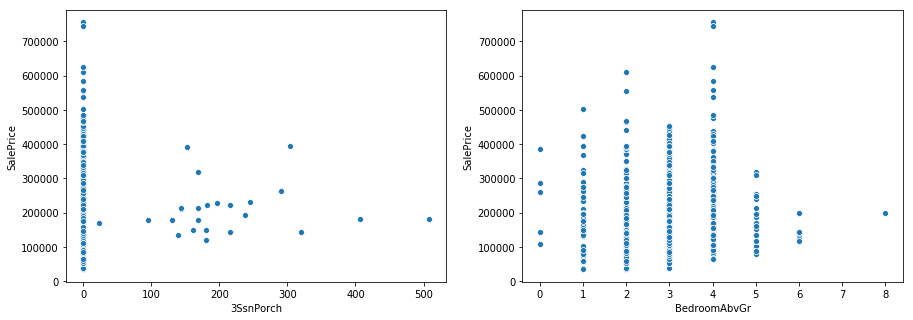

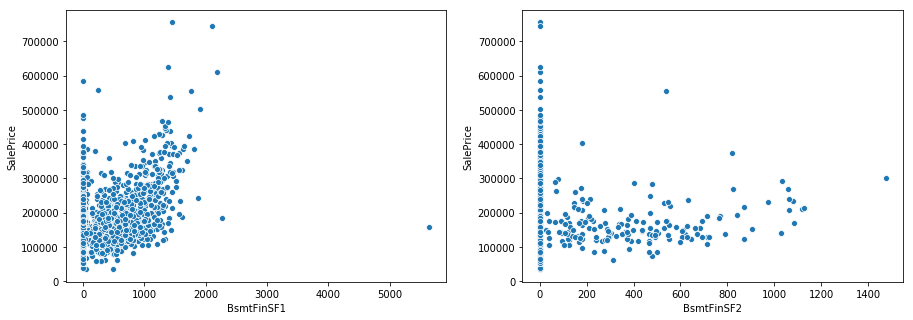

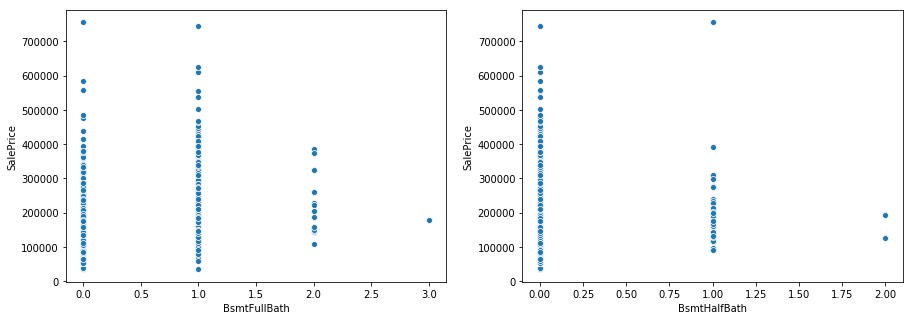

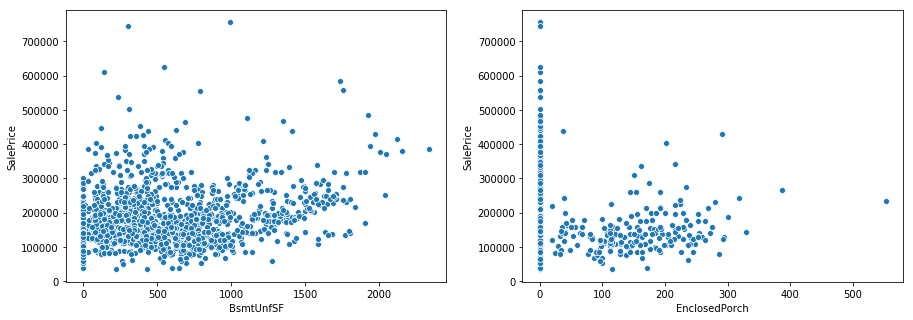

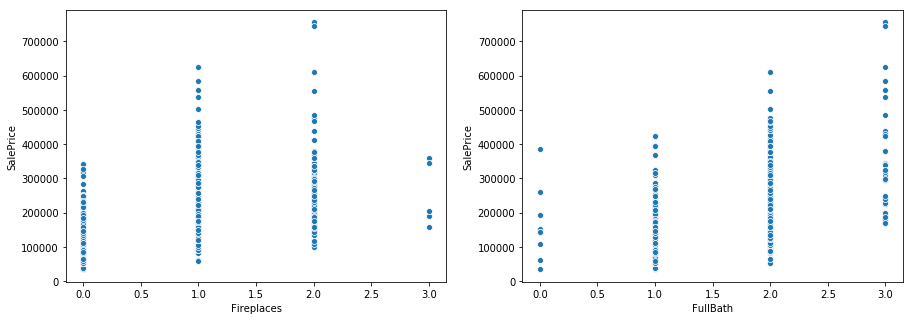

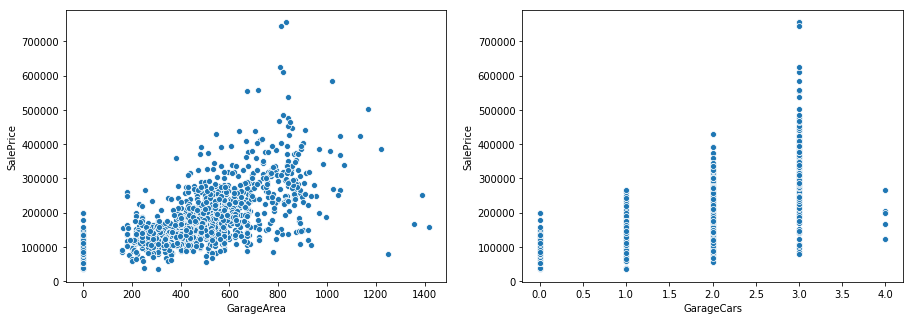

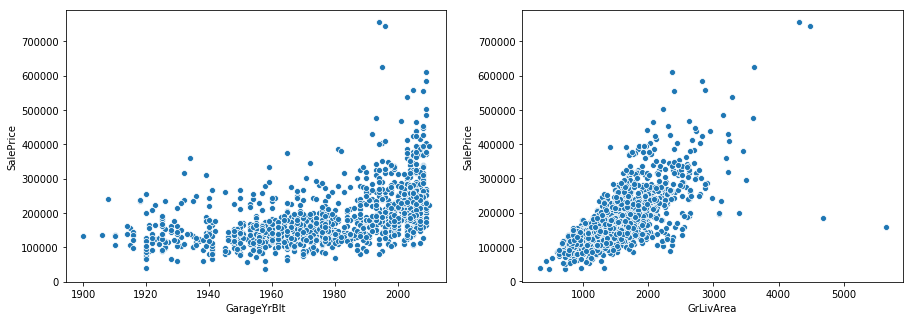

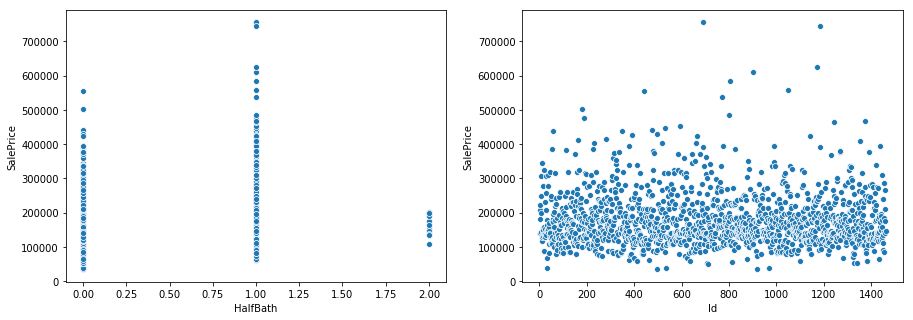

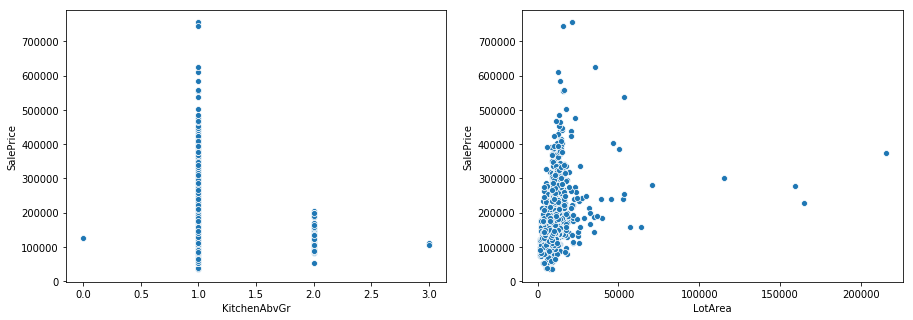

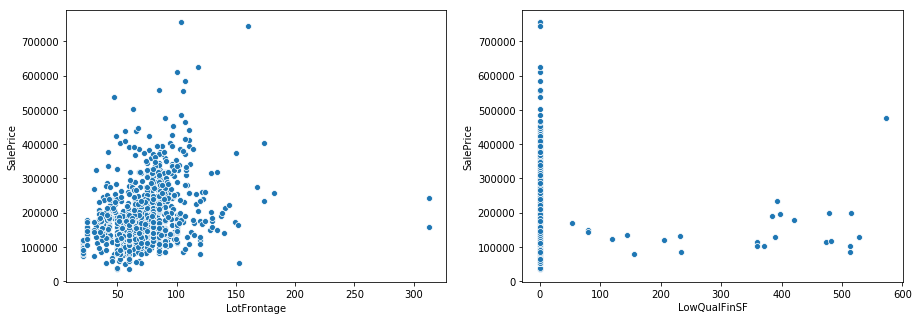

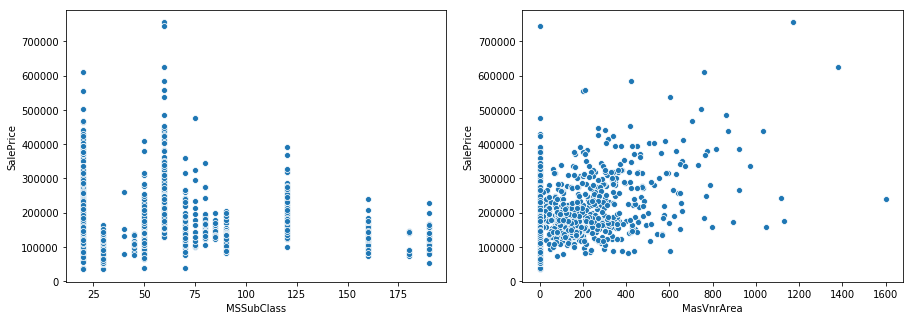

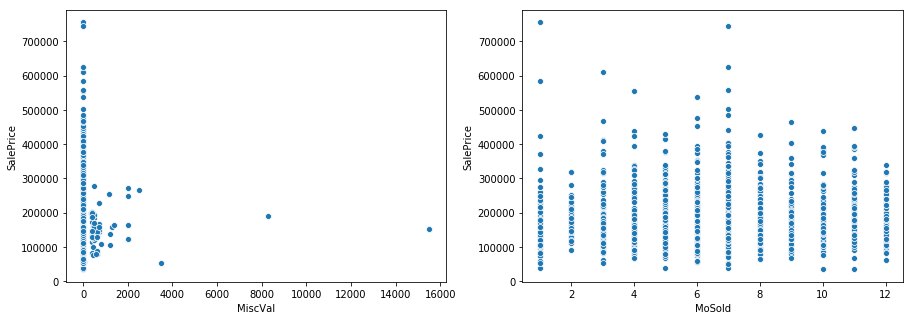

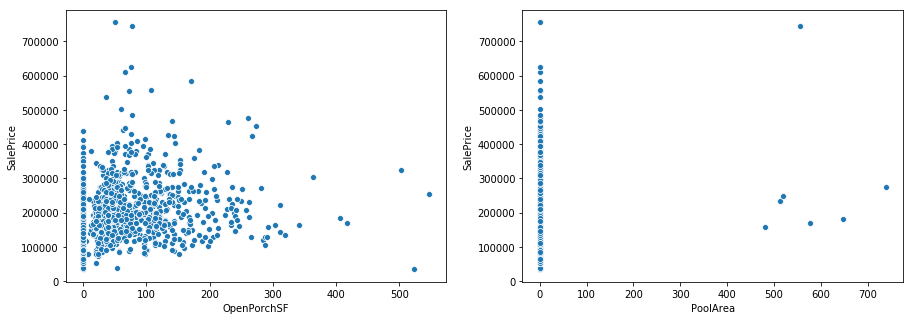

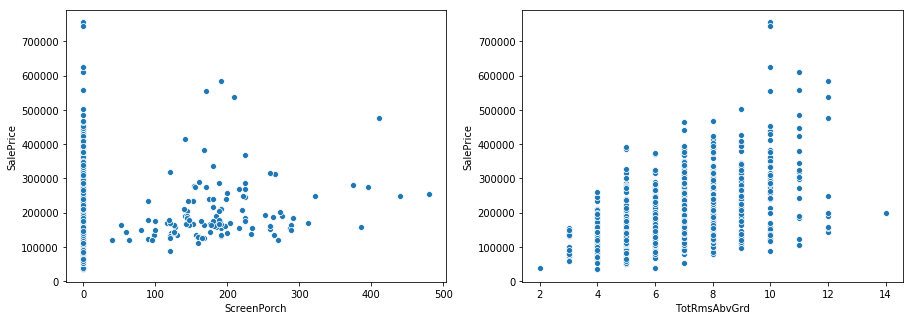

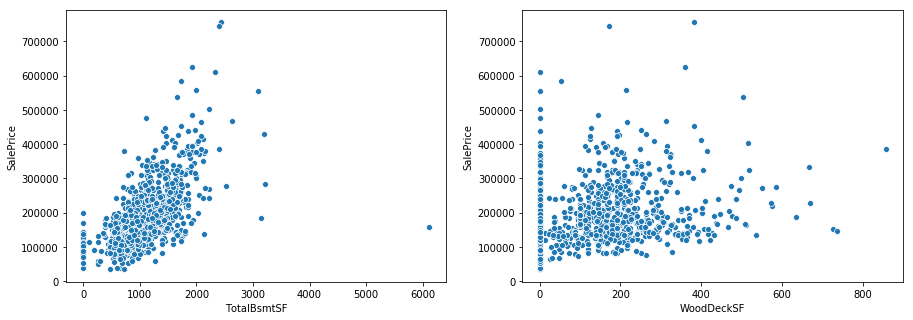

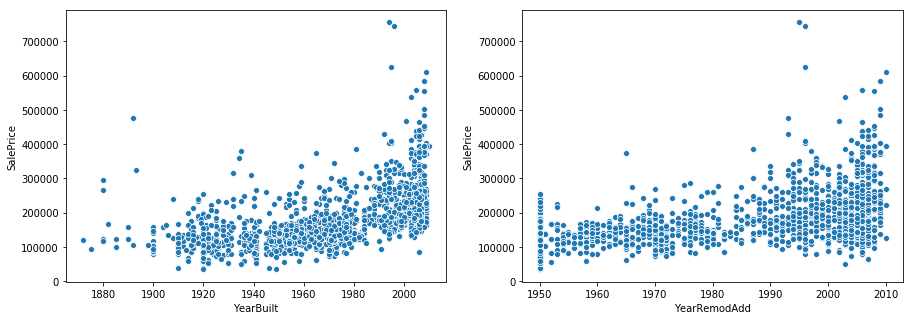

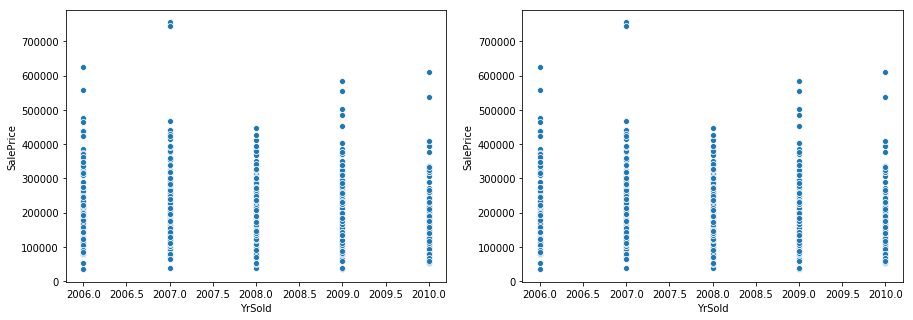

In [64]:
plots_vs_sale_price(sns.scatterplot, *num_features)

Outliers & Useless Features

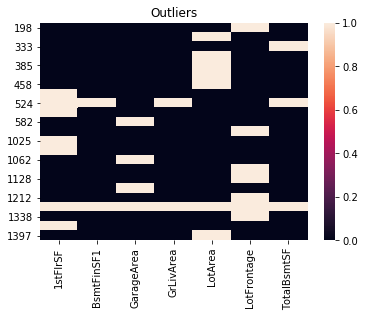

In [66]:
from collections import defaultdict

# Outliers
outlier_ids = {
    '1stFlrSF': train.loc[(train['1stFlrSF']>2500)&(train['SalePrice']<500000),'Id'].tolist(),
    'BsmtFinSF1': train.loc[(train['BsmtFinSF1']>2000)&(train['SalePrice']<200000),'Id'].tolist(),
    'GarageArea': train.loc[(train['GarageArea']>1200)&(train['SalePrice']<300000),'Id'].tolist(),
    'GrLivArea': train.loc[(train['GrLivArea']>4000)&(train['SalePrice']<300000),'Id'].tolist(),
    'GrLivArea': train.loc[(train['GrLivArea']>4000)&(train['SalePrice']<300000),'Id'].tolist(),
    'LotArea': train.loc[(train['LotArea']>50000)&(train['SalePrice']<300000),'Id'].tolist(),
    'LotFrontage': train.loc[(train['LotFrontage']>150)&(train['SalePrice']<300000),'Id'].tolist(),
    'TotalBsmtSF': train.loc[(train['TotalBsmtSF']>3000)&(train['SalePrice']<300000),'Id'].tolist(),   
}
all_ids = np.unique(np.hstack(outlier_ids.values()))
outliers = pd.DataFrame(index=all_ids)
for c in outlier_ids.keys():
    outliers[c] = outliers.index.map(lambda x: 1 if x in outlier_ids[c] else 0)

plt.figure()
plt.title('Outliers')
_ = sns.heatmap(outliers)

# Useless Features
useless_features = ['Id', 
                    'KitchenAbvGr',
                    'LowQualFinSF', 
                    'MSSubClass',
                    'MiscVal', 
                    'MoSold',
                    'PoolArea',
                    'OpenPorchSF', 
                    'ScreenPorch', 
                    'WoodDeckSF',
                    'YrSold',
]

BoxPlots for categorical features

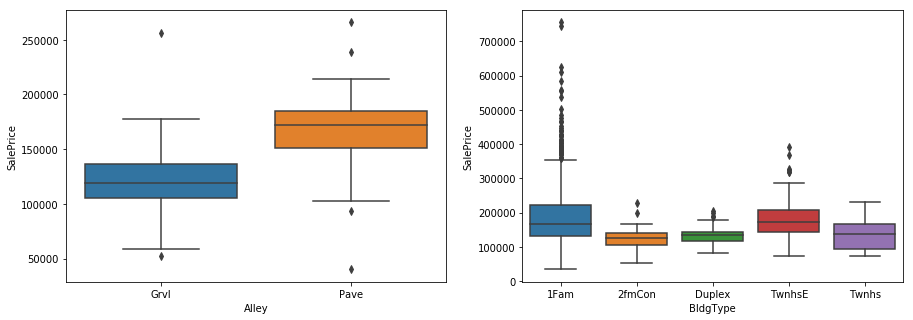

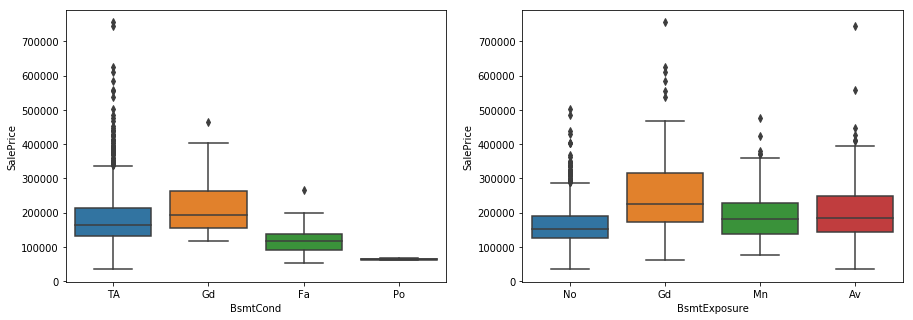

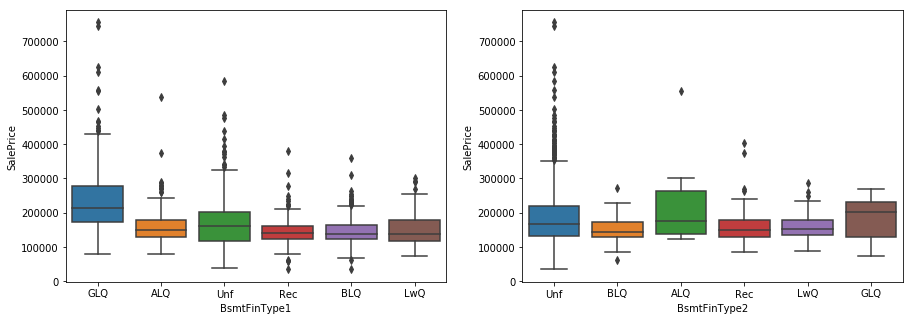

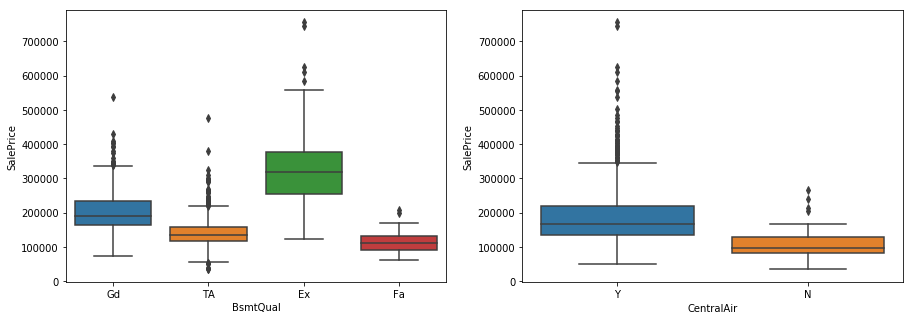

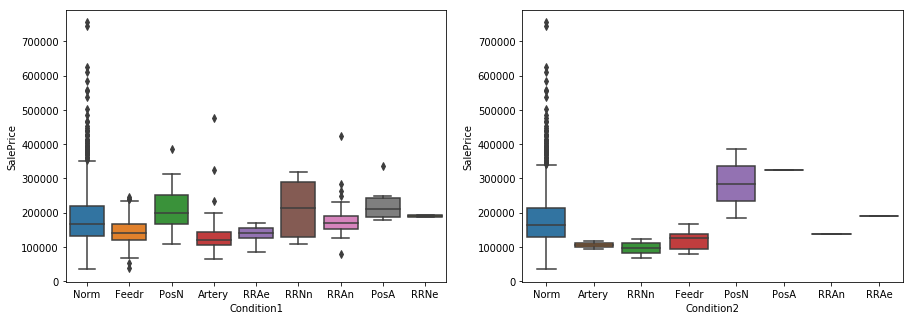

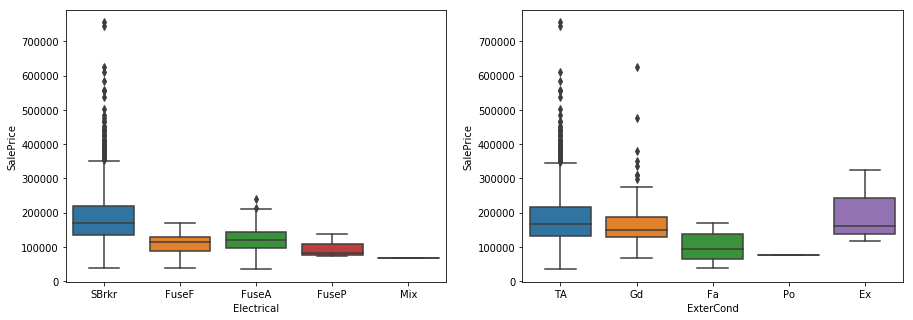

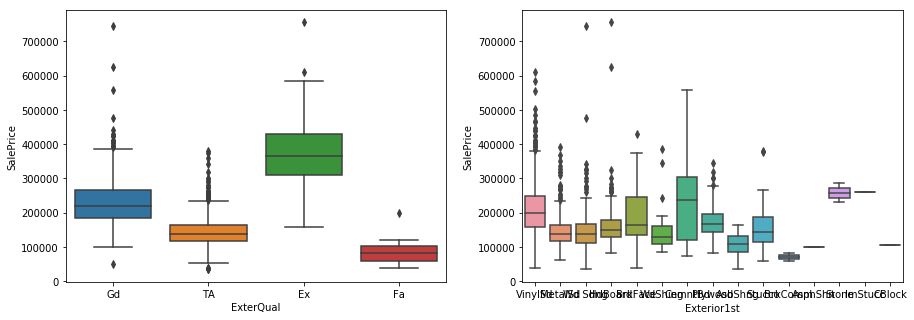

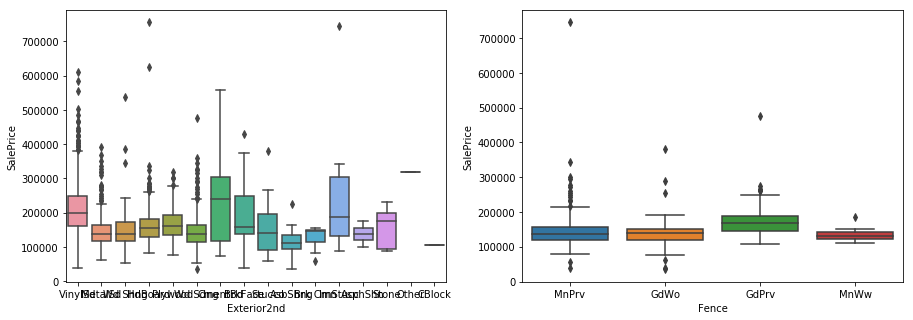

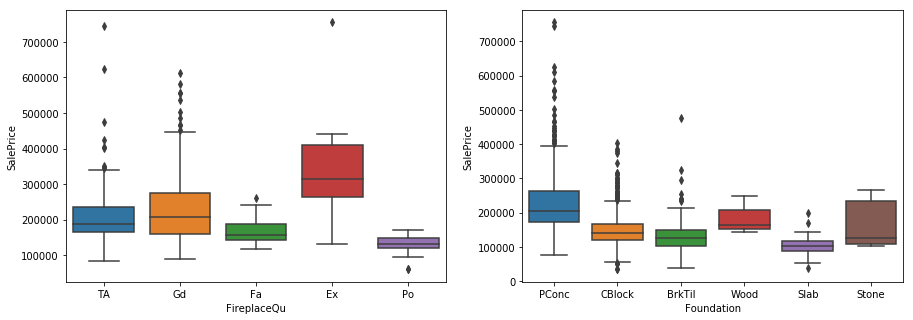

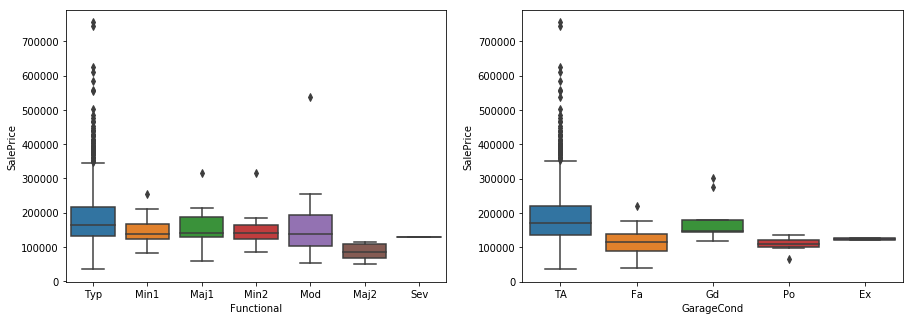

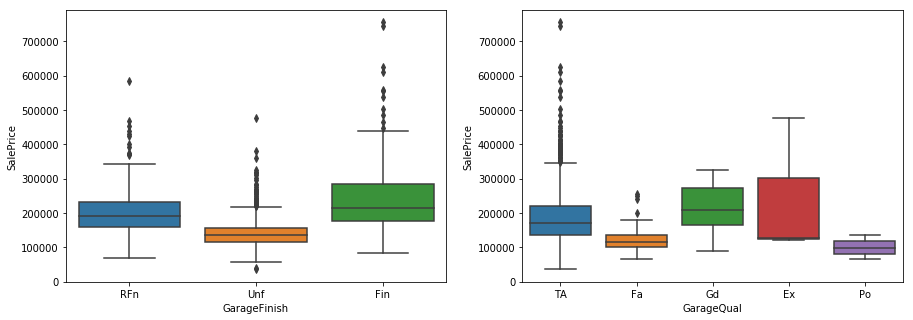

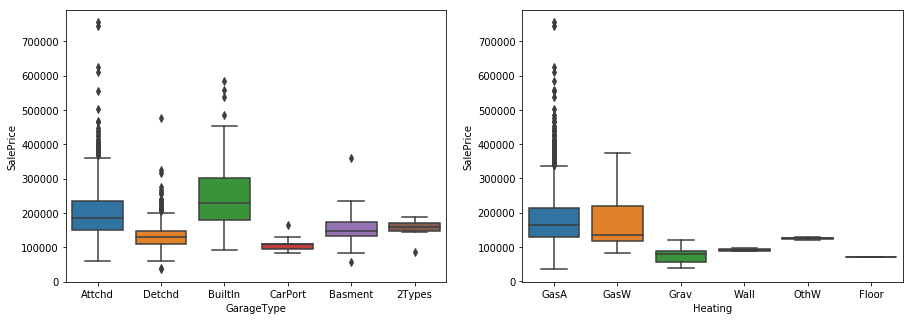

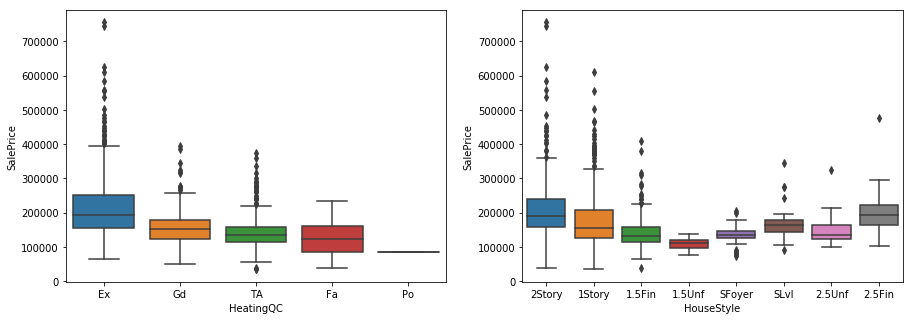

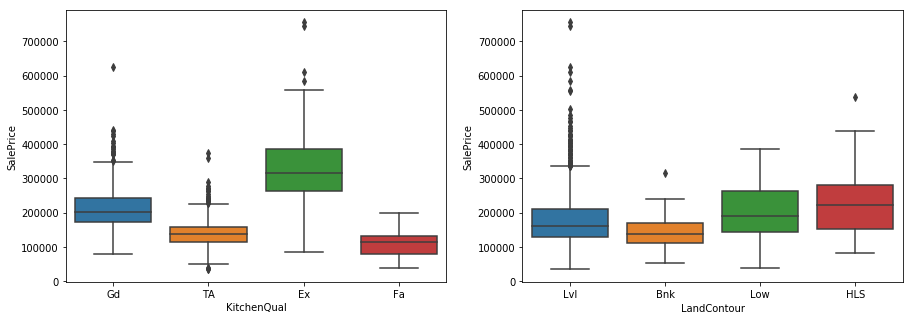

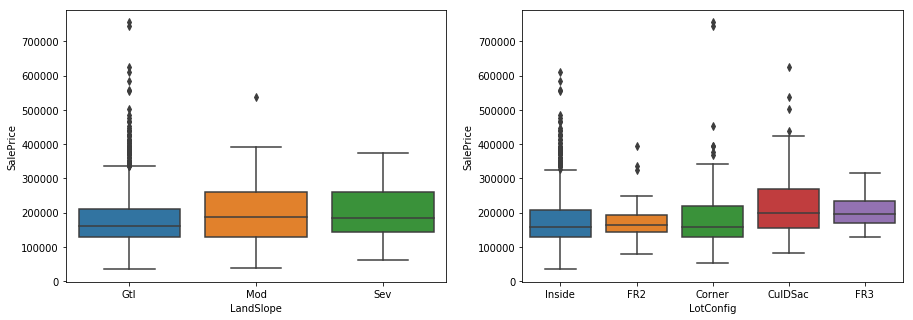

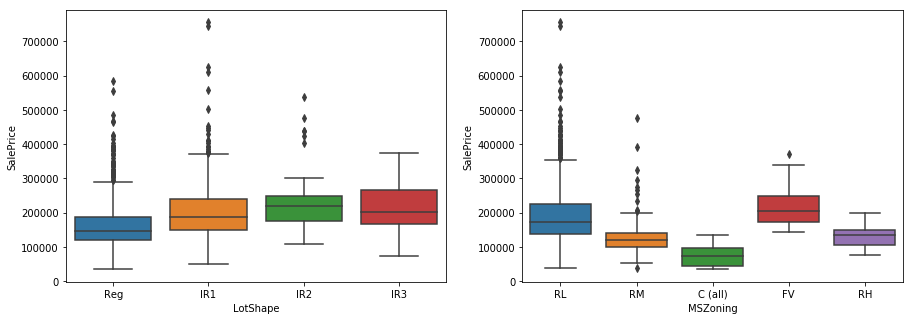

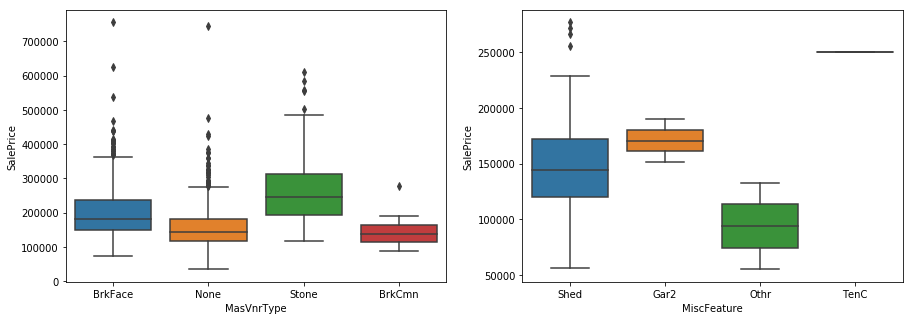

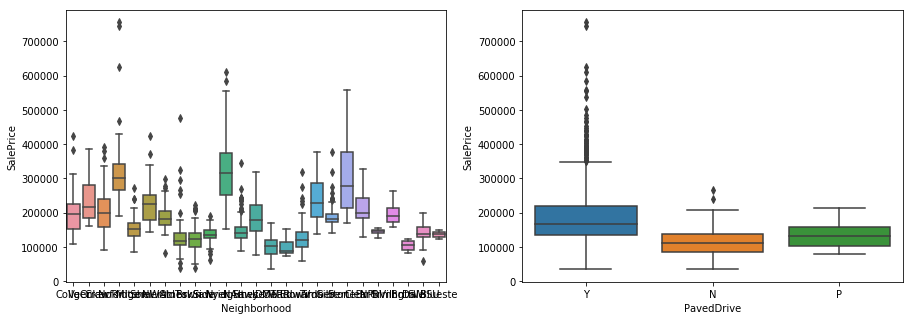

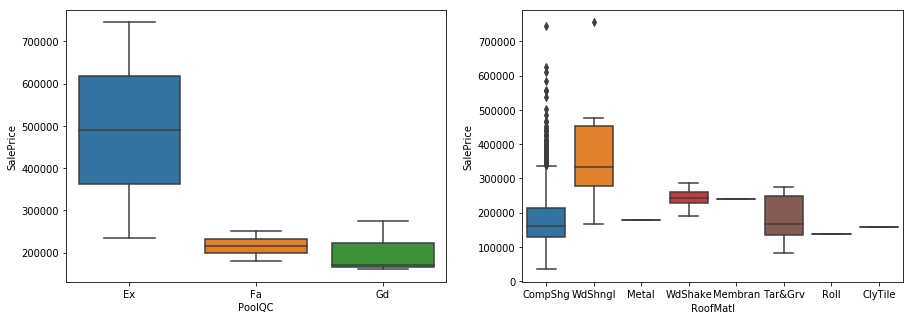

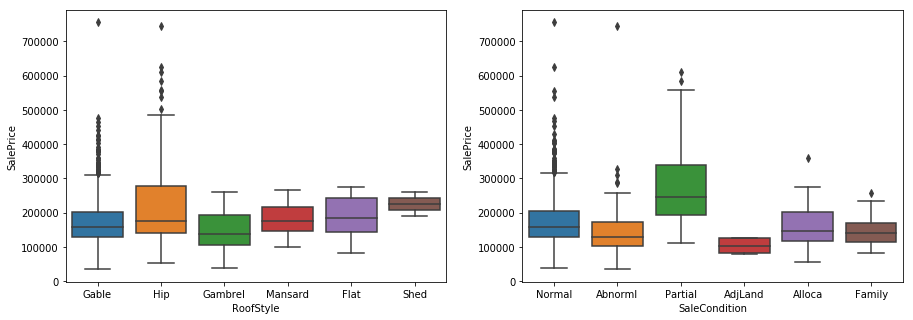

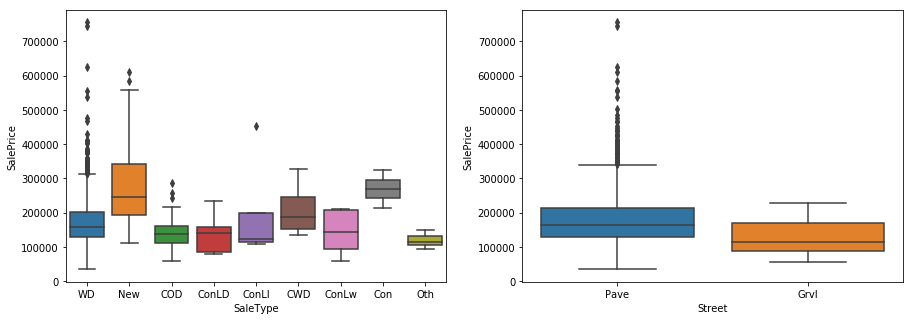

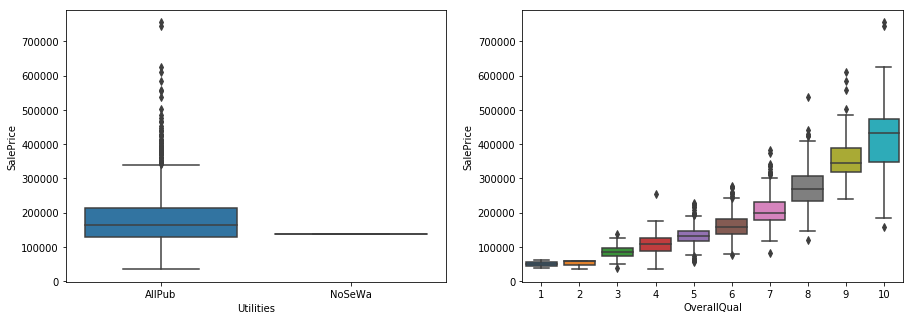

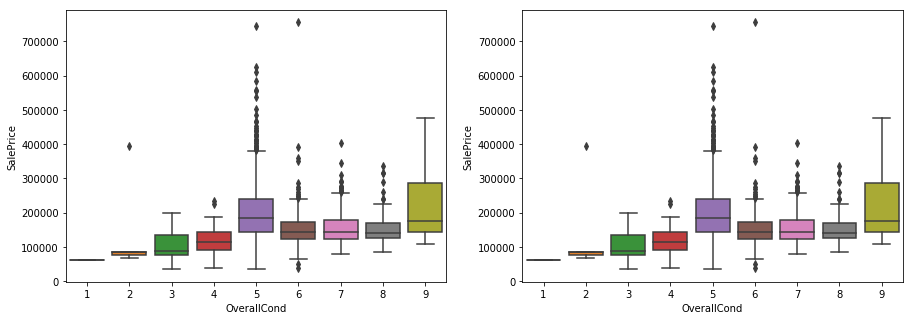

In [67]:
plots_vs_sale_price(sns.boxplot, *cat_features)

In [68]:
# Add more Useless Features
useless_features += [
    'Utilities',
]

Correlation Matrix

In [69]:
corrmat = train.corr()

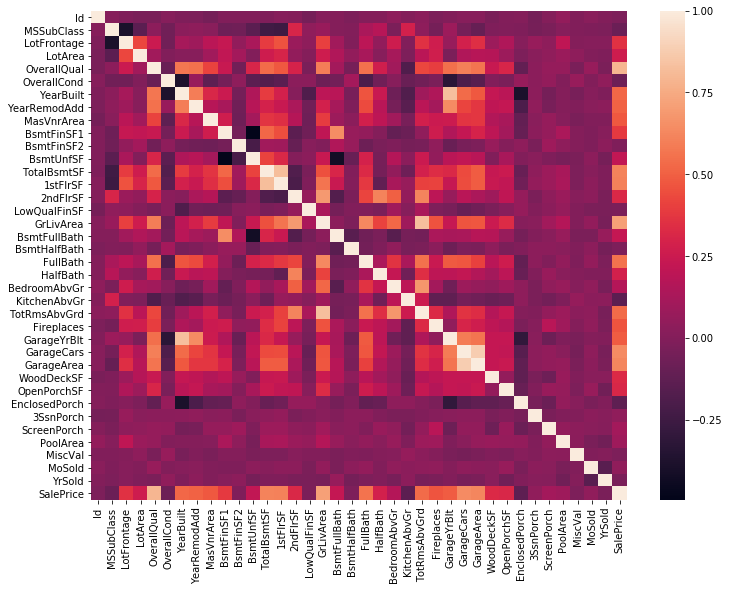

In [70]:
plt.figure(figsize=(12,9))
_ = sns.heatmap(corrmat)

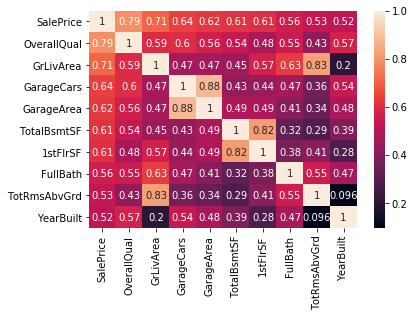

In [71]:
most_correlated_feats = corrmat.nlargest(10 , 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[most_correlated_feats].values.T)
_ = sns.heatmap(cm, annot=True, 
                yticklabels=most_correlated_feats.values, 
                xticklabels=most_correlated_feats.values)

<Figure size 432x288 with 0 Axes>

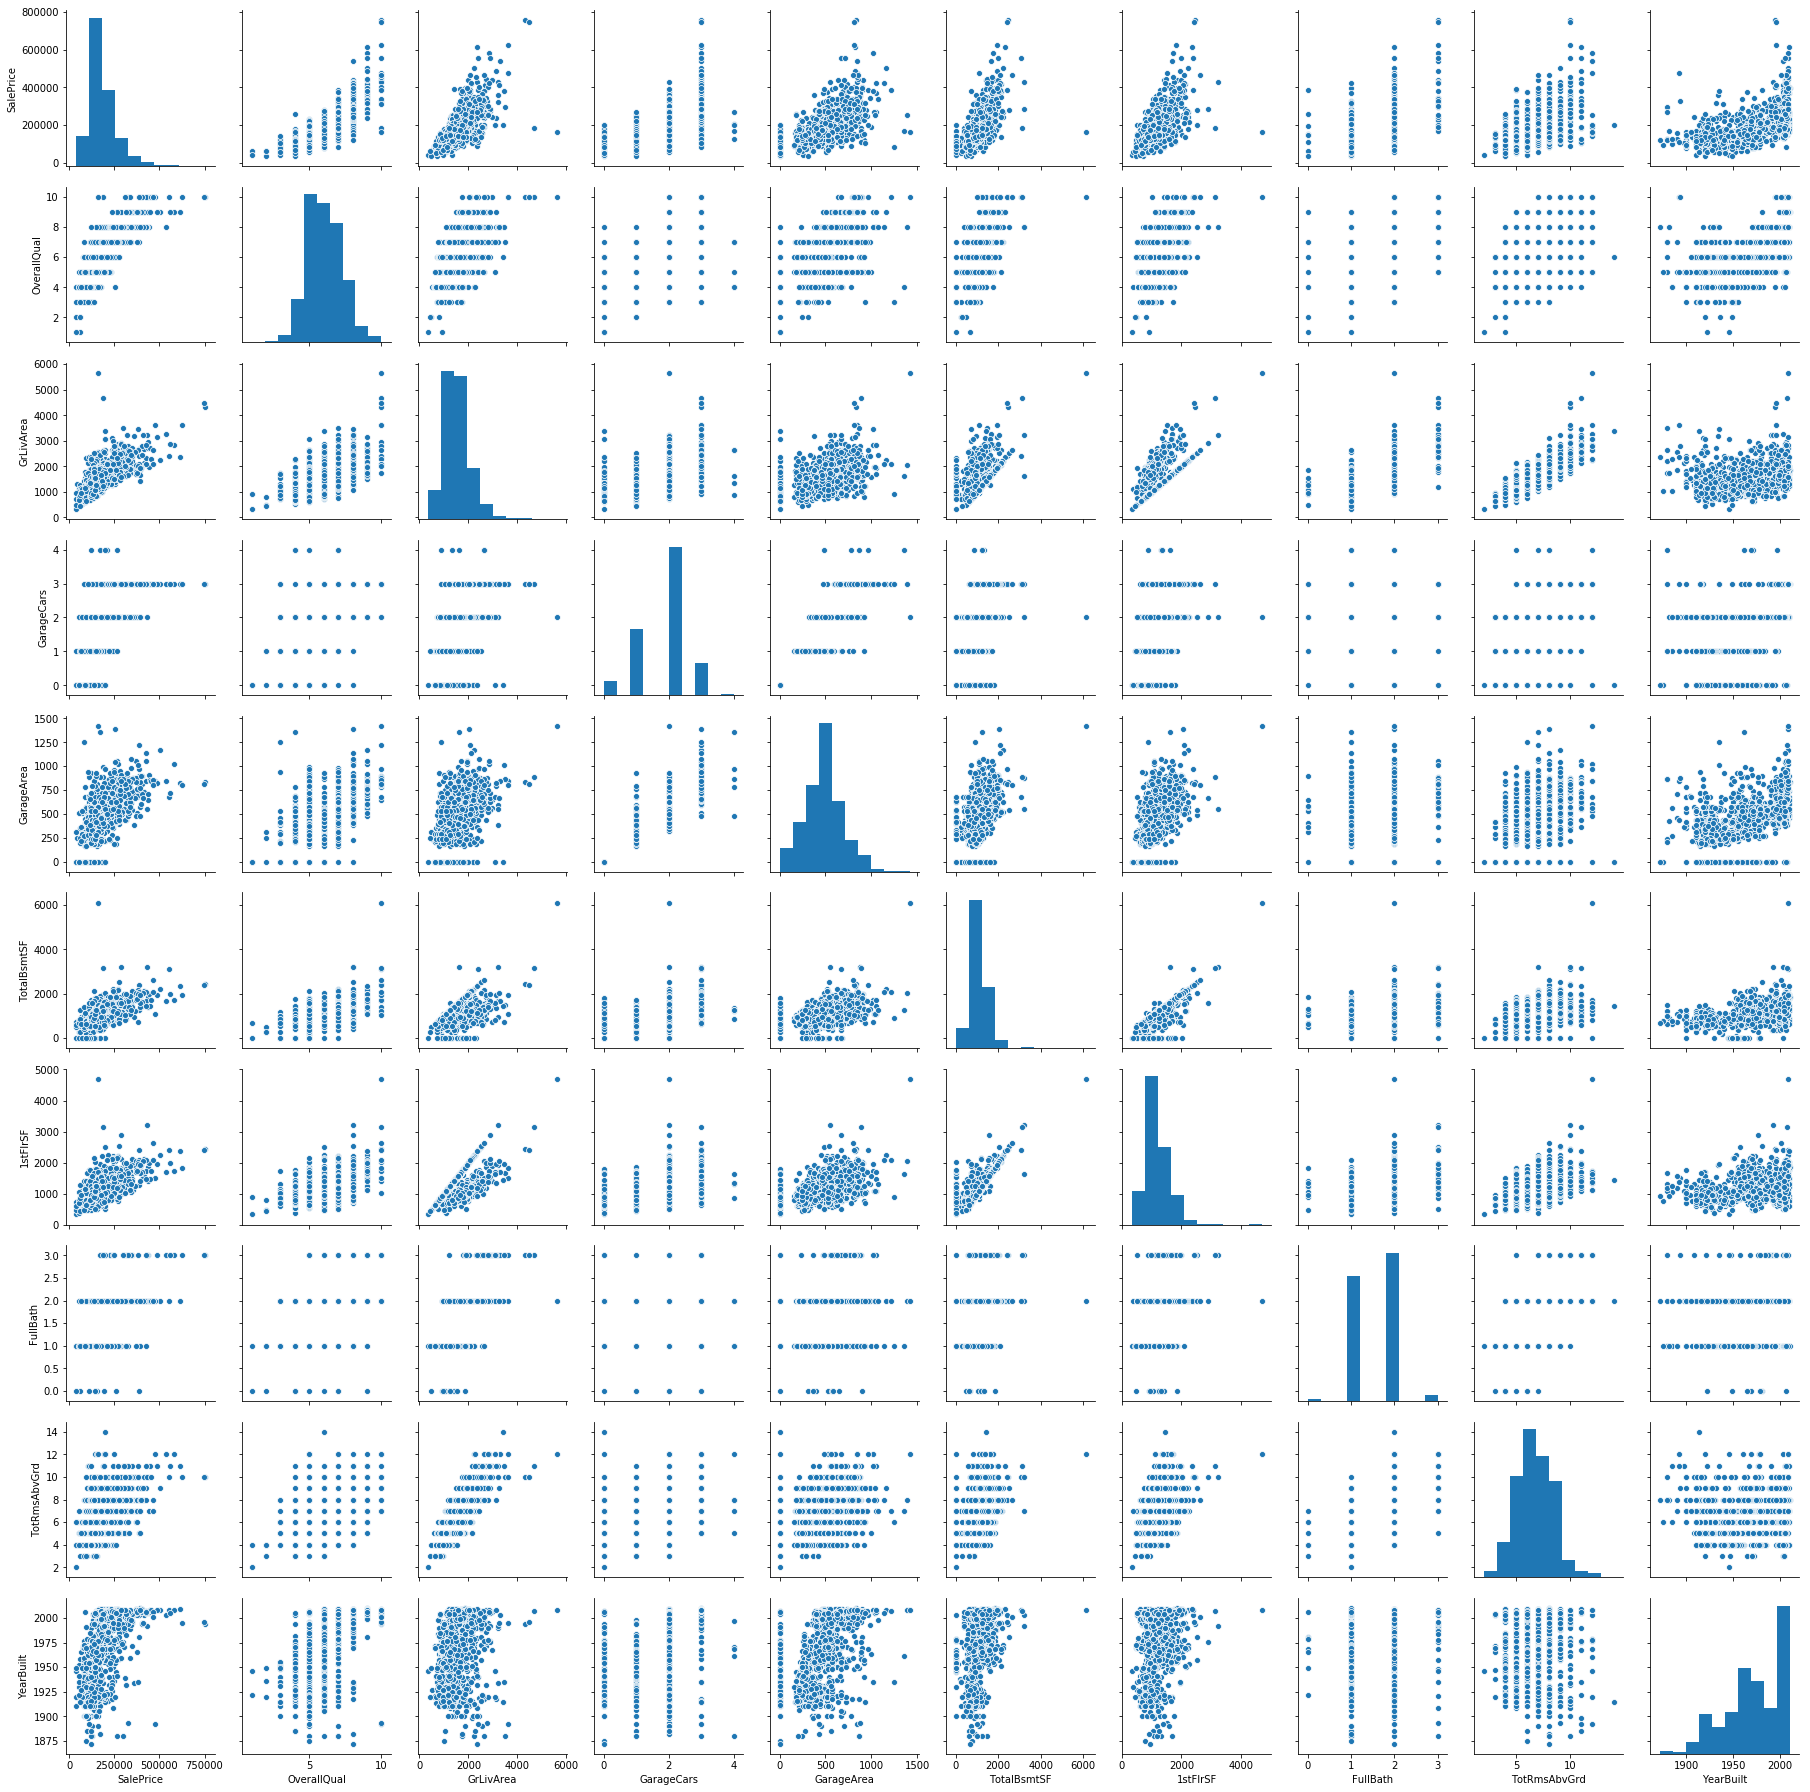

In [72]:
plt.figure()
_ = sns.pairplot(train[most_correlated_feats])

Missing Values PCT

In [73]:
def get_nulls(head=20):
    return round(train.isnull().sum().sort_values(ascending=False).head(head)/len(train)*100,1)
get_nulls()

PoolQC          99.5
MiscFeature     96.3
Alley           93.8
Fence           80.8
FireplaceQu     47.3
LotFrontage     17.7
GarageCond       5.5
GarageType       5.5
GarageYrBlt      5.5
GarageFinish     5.5
GarageQual       5.5
BsmtExposure     2.6
BsmtFinType2     2.6
BsmtFinType1     2.5
BsmtCond         2.5
BsmtQual         2.5
MasVnrArea       0.5
MasVnrType       0.5
Electrical       0.1
Utilities        0.0
dtype: float64

New values for categorical features introduced in test set

In [74]:
def get_uknown_cat_values():
    col = 'BldgType'
    new_cat_values = {}
    for col in cat_features:
        if col in train:
            train_u = train[col].fillna('missing').unique()
            test_u = test[col].fillna('missing').unique()
            res =  list(test_u[~np.isin(test_u, train_u)])
            if res:
                new_cat_values[col] = res

    for k, v in new_cat_values.items():
        print(k, ':', v)

get_uknown_cat_values()

Exterior1st : ['missing']
Exterior2nd : ['missing']
Functional : ['missing']
KitchenQual : ['missing']
MSZoning : ['missing']
SaleType : ['missing']
Utilities : ['missing']


# Feature Engineering

In [75]:
combo = [train, test]

Log sale prices    

In [76]:
train['SalePrice'] = train['SalePrice'].map(np.log)

Remove outliers

In [77]:
drop_idx = train.loc[train['Id'].isin(outliers.index)].index
train.drop(drop_idx, axis=0, inplace=True)

Exclude useless features

In [78]:
useless_features += ['MiscFeature', 'Alley', 'Fence']
cat_features = [feat for feat in cat_features if feat not in useless_features]
num_features = [feat for feat in num_features if feat not in useless_features]

Mean Encodings

In [79]:
global_mean = train[target].mean()
def get_mean_enc(*cols):
    for col in cols:
        if col in train:
            nm = 'average_sale_price_by_'+col
            mean_map = train.groupby(col)[target].mean()
            for df in combo:
                df[nm] = df[col].map(mean_map).fillna(global_mean)    
                


In [86]:
get_mean_enc(*cat_features)
mean_enc_feat = ['average_sale_price_by_'+feat for feat in cat_features]

Impute Missing Values

In [87]:
get_nulls()

MiscFeature                          96.5
Alley                                93.7
Fence                                80.6
BsmtFinType1                          0.0
BsmtFinSF1                            0.0
BsmtFinType2                          0.0
BsmtFinSF2                            0.0
BsmtUnfSF                             0.0
TotalBsmtSF                           0.0
Heating                               0.0
HeatingQC                             0.0
CentralAir                            0.0
Electrical                            0.0
1stFlrSF                              0.0
2ndFlrSF                              0.0
LowQualFinSF                          0.0
average_sale_price_by_OverallCond     0.0
BsmtCond                              0.0
GrLivArea                             0.0
BsmtFullBath                          0.0
dtype: float64

Categorical Features impute with missing

In [88]:
for df in combo:
    for col in cat_features:
        if col in df:
            df[col].fillna('missing', inplace=True)

Numerical Features impute with global mean from train

In [89]:
for col in num_features:
    if col in train:
        mean_col = train[col].mean()
        for df in combo:
            df[col].fillna(mean_col, inplace=True)

In [90]:
get_nulls(10)

MiscFeature     96.5
Alley           93.7
Fence           80.6
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
dtype: float64

In [91]:
X = train.drop(target, axis=1)
y = train[target].values

# First Level Models Evaluations

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")


def cross_val_result(grid):
    res_cols = [col for col in grid.cv_results_.keys() if 'split' in col]
    res_df = pd.DataFrame(grid.cv_results_)[res_cols].T
    print('best_params', grid.best_params_)
    print('best_score', round(grid.best_score_, 2))
    plt.figure()
    plt.title('Cross Validation Scores')
    sns.heatmap(res_df)
    

## Linear Models

Linear Model Pipeline

In [95]:
def get_linear_pipeline(model):
    num_transform = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    cat_transorm = Pipeline(steps=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', num_transform, num_features+mean_enc_feat),
        ('cat', cat_transorm, cat_features)
    ])
    return Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

Ridge

best_params {'classifier__alpha': 37.2759372031494}
best_score 0.92


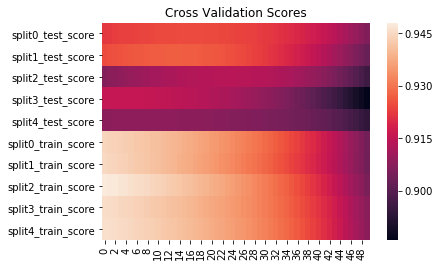

In [96]:
alphas = np.logspace(1, 3, 50)
param_grid = {'classifier__alpha': alphas}

ridge = GridSearchCV(get_linear_pipeline(Ridge()), 
                     param_grid=param_grid, 
                     cv=5, 
                     scoring='r2')

ridge.fit(X, y)

cross_val_result(ridge)

Lasso

best_params {'classifier__alpha': 10.0}
best_score -0.0


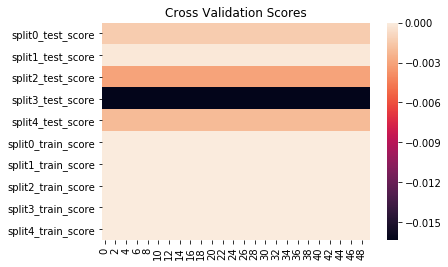

In [35]:
alphas = np.logspace(1, 3, 50)
param_grid = {'classifier__alpha': alphas}

lasso = GridSearchCV(get_linear_pipeline(Lasso()), 
                     param_grid=param_grid, 
                     cv=5, 
                     scoring='r2')

lasso.fit(X, y)

cross_val_result(lasso)

SVR

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


best_params {'classifier__C': 0.003359818286283781, 'classifier__kernel': 'linear'}
best_score 0.92


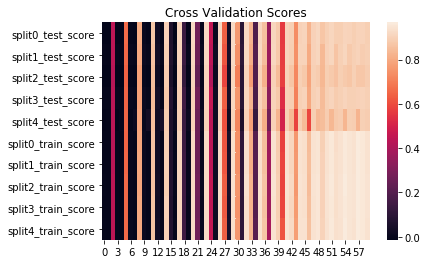

In [112]:
C = np.logspace(-5, 1, 20)
kernels = ['rbf', 'poly', 'linear']
param_grid = {'classifier__C': C,
              'classifier__kernel': kernels
             }

svr = GridSearchCV(get_linear_pipeline(SVR()), 
                   param_grid=param_grid, 
                   cv=5, 
                   scoring='r2', 
                   verbose=3, 
                   n_jobs=-1)

svr.fit(X, y)

cross_val_result(svr)

Kneighbors

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.9s finished


best_params {'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
best_score 0.81


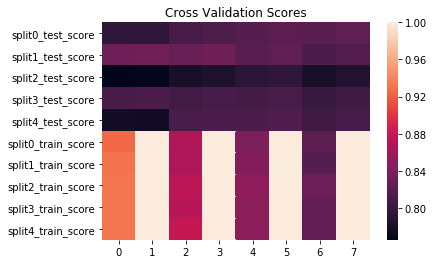

In [128]:
from sklearn.neighbors import KNeighborsRegressor

weights = ['uniform', 'distance']
n_neighbors = [2, 5, 10, 20]
metrics = ['minkowski', 'euclidean']

param_grid = {
    'classifier__weights': weights,
    'classifier__n_neighbors': n_neighbors,
             }


kneigh = GridSearchCV(get_linear_pipeline(KNeighborsRegressor()), 
                   param_grid=param_grid, 
                   cv=5, 
                   scoring='r2', 
                   verbose=3, 
                   n_jobs=-1)

kneigh.fit(X, y)

cross_val_result(kneigh)

### Trees Models

Tree Pipeline

In [159]:
def factorize_cols(cols):
    for col in cols:
        fact_map = pd.factorize(pd.concat([train[col], test[col]]).drop_duplicates())
        fact_map = pd.Series(fact_map[0], index=fact_map[1])
        train[col] = train[col].map(fact_map)
        test[col] = test[col].map(fact_map)
        


In [160]:
factorize_cols(cat_features)

In [188]:
from sklearn.preprocessing import LabelEncoder

def get_tree_pipeline(model):
    num_transform = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    cat_transorm = Pipeline(steps=[
        ('label_encode', LabelEncoder())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', num_transform, num_features+mean_enc_feat),
        ('cat', cat_transorm, cat_features)
    ])
    return Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

def get_simple_pipeline(model):
    
    preprocessor = ColumnTransformer(transformers=[
        ('scaler', StandardScaler(), num_features+mean_enc_feat+cat_features)
    ])
    
    return Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

XGB

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.4min finished


best_params {'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__n_estimators': 1000}
best_score 0.91


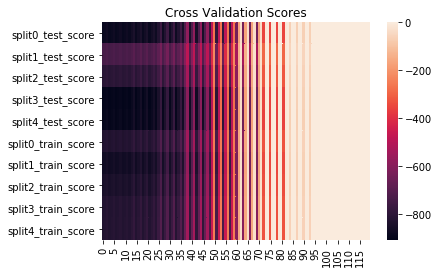

In [177]:
X = train.drop(target, axis=1)
y = train[target].values

xgb_params = {
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__learning_rate': np.logspace(-5, -1, 10),
    'classifier__max_depth': [2,3,5,10]
}

xgb = GridSearchCV(get_simple_pipeline(XGBRegressor()), 
                   param_grid=xgb_params, 
                   cv=5, 
                   scoring='r2', 
                   verbose=3, 
                   n_jobs=-1)

xgb.fit(X, y)

cross_val_result(xgb)

Model Correlation

In [193]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [249]:
models = [
    ridge,
    svr,
    kneigh,
    xgb
]

results = pd.DataFrame(index=X.index, columns=range(len(models)))
test_level_2 = pd.DataFrame(index=test.index, columns=range(len(models)))


for train_idx, test_idx in kfold.split(X):
    X_train = X.iloc[train_idx]
    y_train = y[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y[test_idx]
    
    for i, model in enumerate(models):
        model = model.best_estimator_
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        results.iloc[test_idx, i] = pred
        
        model.fit(X, y)
        test_level_2[i] = model.predict(test)
        

results.columns = ['ridge', 'svr', 'kneigh', 'xgb']
test_level_2.columns = ['ridge', 'svr', 'kneigh', 'xgb']

results['actual'] = y


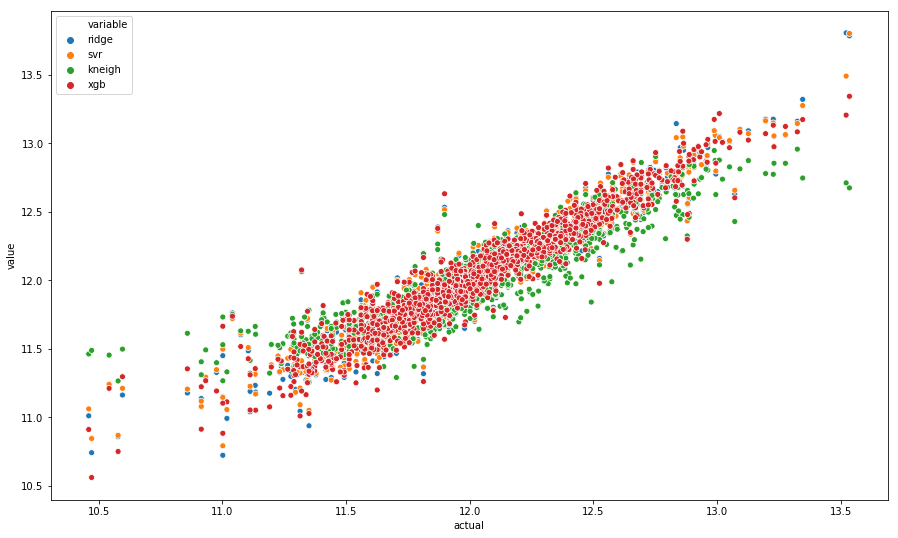

In [250]:
plt.figure(figsize=(15, 9))
_ = sns.scatterplot(x='actual', y='value', hue='variable', data=results.melt(id_vars='actual'))

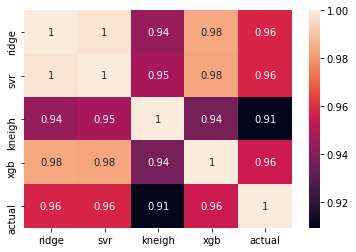

In [251]:
sns.heatmap(results.astype('float64').corr(), annot=True)

# Level 2 Model

In [252]:
X_level_2 = results.drop('actual', axis=1)
y_level_2 = results['actual'].values

In [260]:
model = Ridge()

np.sqrt(cross_val_score(model, X_level_2, y_level_2, scoring=scoring, cv=5))

array([0.10413779, 0.11199969, 0.11646976, 0.10865213, 0.111791  ])

In [261]:
model.fit(X_level_2, y_level_2)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [262]:
model.predict(test_level_2)

array([11.66832553, 11.95157593, 12.12485138, ..., 12.02834653,
       11.65272284, 12.26952635])

In [263]:
def sumbit_result(prediction):
    pd.DataFrame({'Id': test['Id'], 'SalePrice': np.exp(prediction)}).to_csv('submission', index=False) 

In [264]:
sumbit_result(model.predict(test_level_2))